# Classification

## Machine Leanring BenchMark ?
- MNIST dataset( hand writing digit )

![img1](img/mnist.png)
## Purpose
이번 프로젝트에서는 머신러닝 classification Model의 벤치마크로 활용되는 MNIST dataset을 이용하여 sklearn 라이브러리를 사용해 다음과 같은 머신러닝 topic에 대해 코드구현과 함께 이해하고자 한다.

- Class label Imblance
- Precision / Recall Curve(PR Curve)
- ROC Curve
- Confusion Matrix
- Error Analyze( using confusion matrix )
- Binary Classifier
- Multivalued Classifier
- Multi-label Classifier
- Multi-output Classifier

class label이 두개인 경우(True or False로 표현할 수 있는 경우)와 class label이 두개이상인 경우로 나누어 MNIST dataset을 분석한다.

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

### Use sklearn MNIST dataset
1. DESCR : dataset을 설명해 주는 속성.
2. data : vector로 이루어진 datase.
3. target : class label.

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

70,000개의 data tuple, 28 x 28 개의 feature.

In [6]:
y.shape

(70000,)

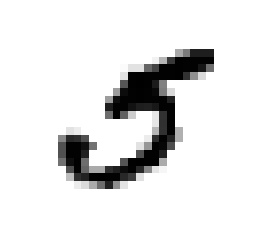

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
plot_digit(some_digit)

### matplotlib
- matplotlib를 이용하여 특정 index의 data를 시각화.
- 흑백 binary pixel로 이루어진 이미지를 확인할 수 있음.

In [8]:
# 위 데이터의 class label이 무엇인지 확인
y[36000]

5.0

### Training dataset, Test dataset 분할

In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

numpy 라이브러리를 활용하여 Model의 학습과정을 랜덤한 데이터 순서로 이루어지게 셋팅.

In [10]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [11]:
shuffle_index

array([49760, 32365, 23850, ..., 40221, 29313, 42355])

In [12]:
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

## Classifier
- Binary Classifier
- Multi-valued Classifier

### First, 5 - Detector 
- data가 '5'인지 아닌지를 True or False로 classify

In [13]:
y_train_5 = (y_train ==5 )

In [14]:
y_train_5

array([False,  True, False, ..., False, False, False], dtype=bool)

In [15]:
y_test_5 = (y_test == 5)

## Stochastic Gradient Descent( SGD )
- 전체 데이터를 사용하여 Model의 parameter를 update하지 않고 데이터 중 일부를 사용하여 parameter를 update하는 방식.
- 즉, all_batch가 아닌 mini_batch를 사용한다.
- SGD는 online_learning으로써 한개의 데이터 단위로 Model을 학습하며, 이 때 정의한 loss function이 최소를 갖게하는 parameter를 구한다.

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=11)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=11, shuffle=True, verbose=0,
       warm_start=False)

### Performance Measures
- k-fold cross validation

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([ 0.96445,  0.96755,  0.9645 ])

위 k-fold cross validation을 통해, 각 fold에서 추정한 accuracy가 95% 이상인 값을 얻었다. 얻어진 결과를 보면 만들어진 Model이 매우 좋은 것 같지만, class label이 비대칭 속성인 경우 다음과 같은 문제가 발생할 수 있다.

## class label imbalance problem
기존의 MNIST dataset은 1~9의 class label로 이루어진 데이터이지만, 위 모델(5-detect)는 class label로 해당  data가 5인지 아닌지를 True or False로 class label을 나타내었다.<br/>
이 부분에서, dataset의 class label 분포가 True인 것은 10%남짓, False인것은 90% 가까운 분포를 갖게 된다.
결과적으로, 모든 dataset에 대해서 아무런 학습도 하지않고 단순히 Falase라고 예측하면 accuracy가 90%에 가까운 결과를 얻게 된다.
위와 같은 결과는 class label의 분포가 비대칭 한 경우 올바른 Performance measurement 방법이 아니다.

In [18]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')
# 위 모델은 모든 dataset에 대해 class label이 5가 아님.(Fasle)라고 예측하지만 측정된 accuracy는 90%가 넘는다.

array([ 0.90905,  0.9103 ,  0.9096 ])

## Confusion Matrix
위 문제에 대해 다른 Performance Measure 방식이 요구되는데, 이 요구사항에 부합하는 것이 Confusion Matrix이다.
Confusion Matrix는 실제 데이터의 class label과 Model을 통해 예측된 prediction 값들의 2차원 table으로써, class label이 True였을때, 혹은 False였을 때 Model은 무엇이라 예측하는 지를 관찰 할 수 있다. Confusion Matrix는 accuracy 이외에도 다음과 같은 평가지표(criteria)를 사용한다

TP : True Positive, FP : False Positive, TN : True Negative, FN : False Negative

- Accuracy
- Error rate
- Sensitivity : TP / P
- Specificity : TN / N
- Presicion : TP / (TP + FP ) = TP / P'
- Recall : TP / (TP+ FN) == TP / P
- F, F(beta) : Precision과 Recall의 조화평균

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([False,  True, False, ..., False, False, False], dtype=bool)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53889,   690],
       [ 1380,  4041]])

위 Confusion Matrix는 아래와 같은 table 구조를 갖는다.<br/>

|Tables   |No|  Yes  |
|---------|------|-------|
|No       | TN  | FP  |
|Yes      |  FN |  TP |


## Precision ( False Positive의 cost를 나타내는 지표)
Precision = TP / (TP + FP) 또는 TP / P' 으로 표현된다.
즉, 위 지표는 Model이 실제 class label은 False이지만 True라고 분류한 경우인 False Positive에 대한 cost를 표현한다.

위 dataset을 예로 들면, Precision = 4122 / 4122 + 3401 이다.

## Recall ( False Negative의 cost를 나타내는 지표 )
Recall = TP / (TP+FN ) 또는 TP / P 으로 표현된다. 즉, 위 지표는 Model이 실제 class label은 True이지만 False라고 분류한 경우인 False Negative에 대한 cost를 표현한다.

위 dataset을 예로 들면, Recall = 4122 / ( 4122 + 1299 ) 이다.

## 결론
데이터 분석에 있어서 위 지표를 활용하여 Model Selection 과정에 있어, 적용하고자 하는 Application이 FP,FN에 대한 비용(cost)가 무엇이 더 클지, weight는 어떻게 되는지를 판단해서 좋은 모델을 선택 할 수 있다.

예를 들어, 임의의 질병에 대한 양성,음성 판독기를 만들고자 할 때,
False Positive는 정상인을 질병이 있다고 판정한 경우이고
False Negative는 환자를 정상인이라고 판정한 경우 이므로
FN가 FP보다 더 큰 cost를 지닌다고 할 수 있으므로, dataset를 통해 만들어진 Model중 Precision보다 Recall에서 우수한 성능을 보이는 Model을 선택하는 것이 바람직하다.

In [22]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.85415345592897907

In [23]:
recall_score(y_train_5,y_train_pred)

0.74543442169341445

### F1, F(beta)
- Precision과 Recall에 임의의 가중치를 두어 FP,FN에 대한 cost를 측정하는 지표.
- F1은 Precision과 Recall에 1:1의 weight를 가정했을때의 지표를 의미한다.

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.79609929078014174

## Precision / Recall TradeOff
- decision function
- decision score
- threshold

SGD Classifier는 data tuple을 분류하는 원리는 다음과 같다.
SGD는 training을 마친후, unknown data에 대하여 decision function으로부터 decision score를 구하고, 얻어진 decision score > threshold 이면 해당 데이터를 Positive로 분류하고, decision score < threshold 이면 해당 데이터를 Negative로 분류한다.
따라서, SGD Model에 threshold를 높은 값을 설정하게 되면, Positive 판정을 좀 더 엄격하게 한다는 의미이므로 FP가 낮아져, Precision이 상승하게 된다. 그러나, 엄격한 Positive 판정 탓에, Recall = TP / P 에서 True Positive의 절대량값은 상대적으로 감소할 것이므로 Recall은 감소한다.

즉, Precision과 Recall은 서로 Trade off관계에 있다.<br/>
threshold 높을수록 Precision 상승, Recall 감소<br/>
threshold 낮을수록 Precision 감소, Recall 상승<br/>


In [25]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([ 159269.61980567])

In [26]:
threshold = 0
some_digit_pred = (some_digit_score > threshold)
some_digit_pred

array([ True], dtype=bool)

In [27]:
threshold = 200000
some_digit_pred = (some_digit_score > threshold)
some_digit_pred

array([False], dtype=bool)

## Precision / Recall Curve
- X축을 decision score으로 하여, threshold의 값에 따라 Precision과 Recall의 값과 변화를 확인할 수 있는 그래프.
- Trade off 관계를 확인할 수 있다.

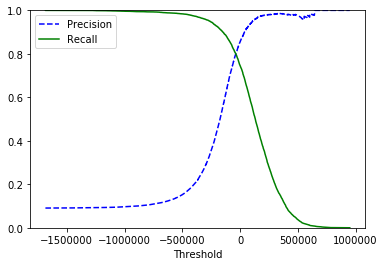

In [28]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

따라서, 위 PR Curve를 통해 Application에 적용할 Model을 선택하고자 할 때 Precision과 Recall값을 threshold 값에 따라 확인 할 수 있으므로, 최적의 Precision, Recall 값을 얻는 Threshold를 선택할 수 있다.

## ROC Curve
- Receiver Operating Characteristic (ROC) Curve의 준말로써 PR Curve와 같이 class label이 Imbalance한 분포를 가질 경우 Model을 평가하기 위한 방법 중 하나로써 사용된다.
- ROC Curve는 Model을 평가하고자 하는 척도로써 TPR(True Positive Rate,Recall)과 FPR(False Positive Rate)를 사용한다.

TPR은 Recall과 동일하게 TP / P 값을 갖고 False Negative에 대한 cost를 나타낸다.
FPR은 FP / N 값을 의미하며, 1 - Specificity ( 1- N / TN ) 과 동일한 의미이며 False Positive에 대한 cost를 나타낸다.

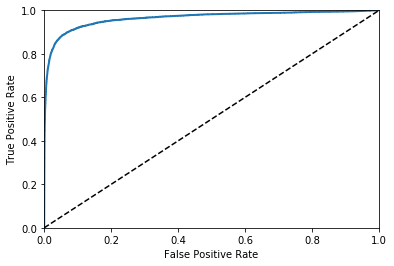

In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

ROC Curve도 PR Curve와 유사하게 TPR과 FPR이 서로 trade off 관계에 있음을 확인할 수 있다.
즉, TPR이 커지면(FN가 최소화되면) FPR이 작아진다.(FP가 커진다.)
점선으로 표시된 직선은 data tuple을 완전히 랜덤하게 분류했을 경우를 나타낸다. 따라서, 좋은 Model이란 FP,FN이 적은 모델을 의미하므로 점선과 표시된 선에 최대한 멀리 떨어져 좌측상단에 근접하는 것이다. ( 가장 큰 면적을 지닌다. )


### ROC AUC
- ROC Curve는 Model의 성능평가를 곡선에 해당하는 면적으로 구한다.
- ROC Area Under the Curve

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96413011107926949

## RandomForest
- Decision Tree Model을 여러개 사용하여 최종적으로 각 Model의 결과를 모두 취합하여 class label을 예측하는 Ensemble방법의 일종

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=11)
y_probs_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [32]:
y_socres_forest = y_probs_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_socres_forest)

## SGD Classifier와 RandomForest Classifier 간 성능비교 ( ROC Curve )

plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [33]:
roc_auc_score(y_train_5,y_socres_forest)

0.99265063972989809

Ensemble 방법인 RadomForest Classifier 방법이 SGD Classifier 보다 좋은 성능을 보임을 확인할 수 있다.

## Multinomial Classifier
Multinomial Classifier는 dataset의 class label이 2개 이상인 데이터분류를 의미한다.
본 프로젝트에서 활용되는 MNIST dataset또한 class label이 0~9로써 10개를 지녔으므로 Multinomial Classifier를 요구한다.

Decision tree,RandomForest,Naive Bayes의 경우 바로 적용되는 알고리즘 자체가 별도의 처리가 필요 없이 다중 클래스 라벨을 처리 할 수 있지만,
SGD Classifier 혹은 SVM은 바로 다중 클래스 라벨을 처리할 수 없기 떄문에 다음과 같은 과정을 거쳐 문제해결한다.

### OvA(One-versus-all)
MNIST dataset을 예로들면, (0 or not 0),(1 or not 1) ...과 같이 특정한 클래스 라벨과 그것이 아닌것에 해당하는 Binary classifier를 여러개 만든 뒤에, 각 classifier에서 얻는 예측값(sklearn : score) 중 가장 높은 것을 선택하여 Multinomial을 구현하는 방법이다.
MINIST dataset은 class label이 10개이므로 OvA방법을 사용하면 총 10개의 Binary Classifier가 필요하다.

### OvO(One-versus-One)
MNIST dataset을 예로들면, (0 or 1),(0 or 2),...(1 or 7),(1 or 8)...의 특정한 클래스 라벨과 다른 클래스 라벨간의 Binary classifier를 여러개 만들어서 위와 동일한 방법으로 가장 높은 예측값을 얻는 것을 선택하는 방법이다. OvO는 OvA보다 좀 더 많은 갯수의 Model을 요구하여 sklearn에서는 default 값으로 OvA를 사용하게 되지만 SVM과 같이 OvA가 불가능한 경우 또는 임의로 설정하여 OvO를 사용하기도 한다.

In [34]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [35]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score
# 얻어진 vector에서 index 5번째인 클래스라벨(5)를 가르키는 score가 가장 높음을 확인 할 수 있다.

array([[-250065.47103371, -284645.87583857, -342322.7212332 ,
        -196551.0999399 , -258914.43446822,  159269.61980567,
        -630386.54050595, -425518.72887841, -696196.86020952,
        -581016.81383204]])

In [36]:
np.argmax(some_digit_score)

5

In [37]:
sgd_clf.classes_
# 5번째 index는 5를 가르킴

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

### 임의로 OvO 방법 설정

In [38]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=11))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [39]:
len(ovo_clf.estimators_)
# 45개의 binary classifier사용

45

In [40]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [41]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0.1,  0. ,  0. ,  0. ]])

In [42]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([ 0.86787642,  0.86829341,  0.87688153])

In [43]:
cross_val_score(forest_clf,X_train,y_train,cv=3,scoring='accuracy')

array([ 0.94046191,  0.94094705,  0.93959094])

Multinomial Classifier에 대하여 k-fold cross validation을 사용했을 때 SGD Classifier는 85%의 accuracy를, RandomForest는 94%의 accuracy를 얻음을 확인하였다.

## Data Transformation( Normalizaiton )
Model의 학습 과정 중 error를 구하는 경우 데이터의 각 feature가 error에 기여하는 정도를 동일하게 하기 위해 각 feature들을 Normalization하여 Model의 accuracy를 향상시킨다.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([ 0.90976805,  0.91179559,  0.90893634])

데이터 전처리 과정을 거쳐 accuracy가 향상하였음을 확인 할 수 있다.

## Error Analysis
학습 모델(Training Model)을 Model Selection과정을 통해 최적의 모델을 구하고, Validation 과정을 통해 모델의 최적의 hyperparameter를 구하고 데이터 전처리까지 모두 완료한 상황에서 좀 더 품질개선을 하려면?

- Model에서 performance를 저하시키는 요인의 출처가 어디인지를 파악한다.

In [45]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5746,    4,   17,   11,   10,   44,   45,    8,   35,    3],
       [   1, 6498,   45,   23,    5,   41,    6,   11,  103,    9],
       [  61,   38, 5320,   95,   73,   24,  100,   65,  169,   13],
       [  45,   43,  145, 5328,    2,  235,   37,   57,  143,   96],
       [  21,   28,   43,    8, 5342,    8,   62,   32,   86,  212],
       [  73,   37,   37,  194,   76, 4595,  119,   27,  173,   90],
       [  31,   24,   39,    2,   35,   88, 5652,    5,   42,    0],
       [  22,   19,   68,   25,   51,   10,    6, 5861,   14,  189],
       [  53,  157,   69,  146,   10,  161,   60,   30, 5029,  136],
       [  47,   33,   29,   83,  164,   36,    3,  236,   79, 5239]])

### Error visualization
- matplotlib를 사용하여 confusion_matrix를 visualization
- 각 cell이 black에 가까울 경우 빈도가 적은 것이고, 흰색에 가까울 수록 빈도가 많음을 의미.
- 대각선 cell은 prediction과 실제 데이터값이 서로 일치하는 경우로써 가장 많은 빈도를 나타냄을 확인할 수 있다.
- 위 대각선 cell 중 숫자 '5'에 해당하는 cell은 다른 대각선보다 상대적으로 음영이 진 것으로 보아 Model이 class label이 '5'에 해당하는 경우 다른 숫자에 비해 classificaion 성능이 떨어진다고 판단할 수 있다.

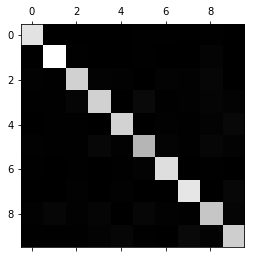

In [46]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

위 시각화는 각 class label의 분포. 즉, 각 class label에 속하는 데이터 tuple의 절대량에 의존하므로, 각 columns에 대해 normalization하여 Model이 각 class label에 대한 classification 성능을 상대량으로 알아보도록 한다. 

In [47]:
row_sums = conf_mx.sum(axis=1,keepdims=True)

In [48]:
norm_conf_mx = conf_mx / row_sums

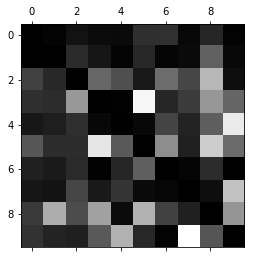

In [50]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

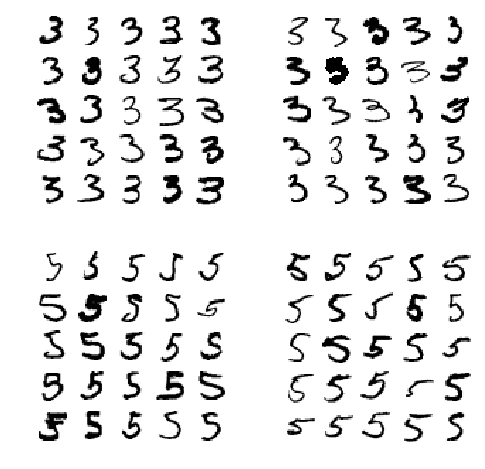

In [51]:
cl_a,cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)

### 분류된 MNIST Dataset를 시각화.
(class label,prediction) 이라 하면, 위 데이터의 구성은 다음과 같다.
- 좌측상단 : 실제 class label 3 and 예측값 3
- 우측상단 : 실제 class label 3 and 예측값 5
- 좌측하단 : 실제 class label 5 and 예측값 3
- 우측하단 : 실제 class label 5 and 예측값 5

|   | 3  | 5  |
|---|---|---|
| 3  | (3,3)  | (3,5)  |
| 5  | (5,3  |  (5,5) |

위 Error분석 결과를 통해, training dataset에 noise가 존재함을 확인 할 수 있다. 데이터 분석과정의 디버깅은 code,model,data 3개를 모두 확인해야 하는데, 위 시각화를 통해 dataset에 사람이 3과 5를 명확하게 작성하지 않고 휘갈겨 쓴 데이터 때문에 모델이 학습 및 분류 작업을 제대로 수행하지 못함을 확인 할 수 있다. 프로젝트시 사용한 모델은 Stochastic Gradient Descent Model로써, 각 pixel 단위로 실제 class label과의 loss fuction을 구하는 모델이다. 이 모델은 'pixel 단위 loss fuction'계산을 수행하므로 3과 5의 대부분의 pixel이 서로 유사한 점이 많으므로 이러한 분류 결과가 나옴을 예상할 수 있다.


## Image 분석에 더 좋은 Model? ( CNN ) 
최근 Image 분석에 자주 사용되는 기술은 인공신경망의 일종인 CNN(Convolution Neural Network)이다. CNN은 기존의 fully-connected layer만으로 이루어진 DNN과는 다르게 filter의 크기 단위로 이미지의 pixcel을 분석하게 되는데, 이는 '이미지에서 근처에 있는 pixel은 유사함을 보일 가능성이 있다'라는 전제를 바탕으로 한다. (https://github.com/HyunSu-Jin/CNN)



## Multilabel Classification
위 MNIST dataset으로 class label이 0-9 임을 예측하였지만, class label로써 binary type vector를 요구하는 경우가 있다.
MNIST data의 예시는 다음과 같다.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
knn_clf.predict([some_digit])
# 숫자 5 에 해당하는 data에 대해 다음과 같이 옳바른 분류를 수행.

array([[False,  True]], dtype=bool)

### Multilabel Classifier의 성능평가?
Multilabel Classification는 두개이상의 class label에 대해 예측하므로 Model이 도출해 낸 vector에서 일부는 맞고 일부는 틀린 경우가 있다.
따라서, 기존의 한개의 class label을 평가하는 척도로 사용되던 accuracy외에 다른것이 필요하다.
이 때 사용되는 척도 중 한개로써 각 vector의 element weight가 모두 동일하다는 가정으로 F1 score를 사용한다.

In [54]:
#y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

## Multioutput Classification
Multilabel classification은 ouput vector로 각 element가 binary boolean data를 갖지만, multiouput classification은 numeric type을 가질 수 있다. 이러한 경우가 MNIST dataset에서는 다음과 같이, Noise data를 clean하는 데이터 전처리(data preprocessing)으로 활용 될 수 있다.


In [59]:
import numpy as np
noise = np.random.randint(0,100,(len(X_train),784))
noise2 = np.random.randint(0,100,(len(X_test),784))
X_train_noise = X_train + noise
X_test_noise = X_test + noise2
y_train_noise = X_train
y_test_noise = X_test

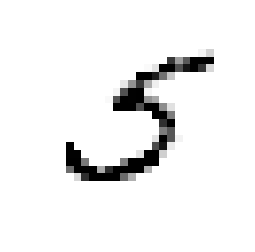

In [62]:
knn_clf.fit(X_train_noise,y_train_noise)
clean_digit = knn_clf.predict([some_digit])
plot_digit(clean_digit)